In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# import plotly 
import numpy as np 
import matplotlib

warnings.filterwarnings("ignore")

# Prediccion de riesgo accidente cerebrovascular

# ETL

### Detalle de columnas

1) id: identificador único
2) gender: "Masculino", "Femenino" u "Otro"
3) age: edad del paciente
4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
5) heart_disease: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
6) ever_married: "No" o "Sí"
7) work_type: "niños", "Govt_jov", "Never_worked", "Private" o "Self-employment"
8) Residence_type: "Rural" o "Urban"
9) avg_glucose_level: nivel promedio de glucosa en sangre
10) bmi: índice de masa corporal
11) smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*
12) stroke: 1 si el paciente tuvo un stroke o 0 en caso contrario
*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente



In [3]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [4]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.dropna(inplace=True)

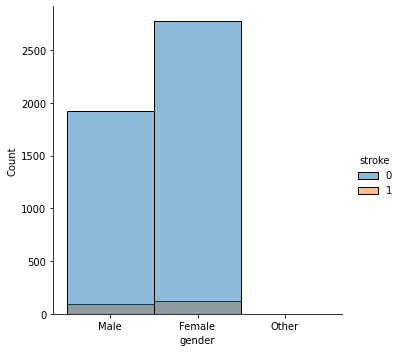

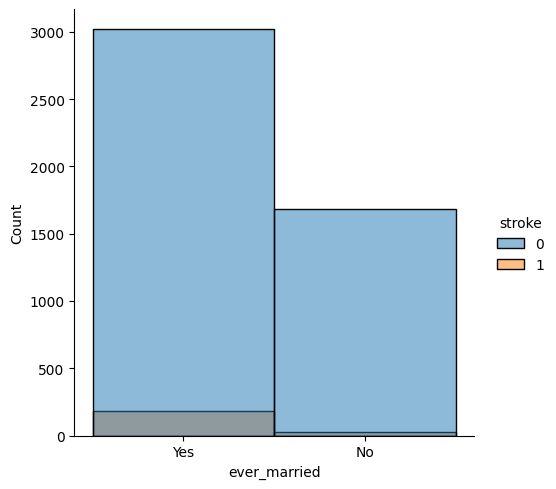

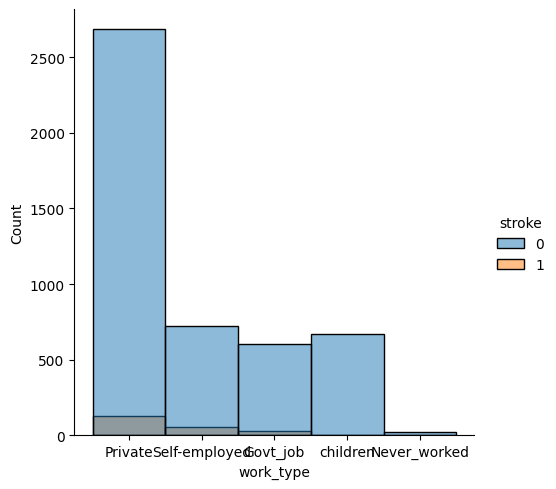

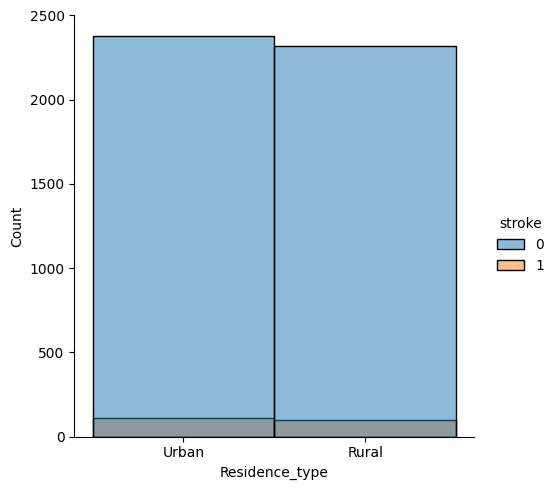

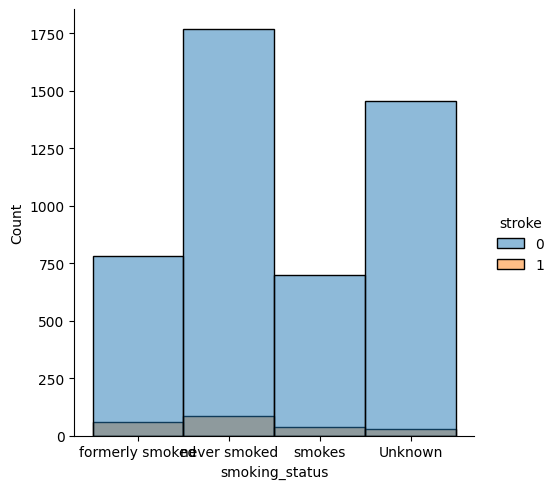

In [7]:
sns.displot( data= data,x =  "gender" , hue="stroke")
sns.displot( data= data,x =  "ever_married" , hue="stroke")
sns.displot( data= data,x =  "work_type" , hue="stroke")
sns.displot( data= data,x =  "Residence_type" , hue="stroke")
sns.displot( data= data,x =  "smoking_status" , hue="stroke")

In [8]:
# Delete single data with gender 'other'
data.drop(data[data.gender == 'Other'].index, inplace = True)

In [9]:
data.to_csv( "data-limpia.csv", index=False)

In [10]:
#Columnas cualitativas
print( "gender:", data['gender'].unique())
print( "ever_married:", data['ever_married'].unique())
print( "work_type:", data['work_type'].unique())
print( "Residence_type:", data['Residence_type'].unique())
print( "smoking_status:", data['smoking_status'].unique())


gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [11]:
data['gender'].replace(['Male', 'Female'], [0,1],inplace=True)
data['ever_married'].replace(['Yes', 'No'], [1,0],inplace=True)
data['work_type'].replace(['Private', 'Self-employed' ,'Govt_job' ,'children', 'Never_worked'], [1,2 ,3,4, 5],inplace=True)
data['Residence_type'].replace(['Urban' ,'Rural'], [0,1],inplace=True)
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [1,2 ,3 ,4 ],inplace=True)

In [12]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,0,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,1,1,105.92,32.5,2,1
3,60182,1,49.0,0,0,1,1,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,2,1,174.12,24.0,2,1
5,56669,0,81.0,0,0,1,1,0,186.21,29.0,1,1
6,53882,0,74.0,1,1,1,1,1,70.09,27.4,2,1
7,10434,1,69.0,0,0,0,1,0,94.39,22.8,2,1
9,60491,1,78.0,0,0,1,1,0,58.57,24.2,4,1
10,12109,1,81.0,1,0,1,1,1,80.43,29.7,2,1
11,12095,1,61.0,0,1,1,3,1,120.46,36.8,3,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int64  
 6   work_type          4908 non-null   int64  
 7   Residence_type     4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.5 KB


In [14]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000
mean,37060.423594,0.590261,42.868810,0.091891,0.049511,0.652812,1.842706,0.492665,105.297402,28.89456,2.584148,0.042584
std,20995.468407,0.491836,22.556128,0.288901,0.216954,0.476125,1.124107,0.499997,44.425550,7.85432,1.090022,0.201937
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.30000,1.000000,0.000000
25%,18602.500000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.067500,23.50000,2.000000,0.000000
50%,37580.500000,1.000000,44.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.680000,28.10000,2.000000,0.000000
75%,55181.750000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.495000,33.10000,4.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.60000,4.000000,1.000000


In [15]:
data.to_csv( "data-numerica.csv", index=False)

# Matriz de Correlación

In [16]:
data = pd.read_csv('./data-numerica.csv')
data = data.drop(['id'], axis=1) 

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

TypeError: Axis._set_ticklabels() takes 2 positional arguments but 3 were given

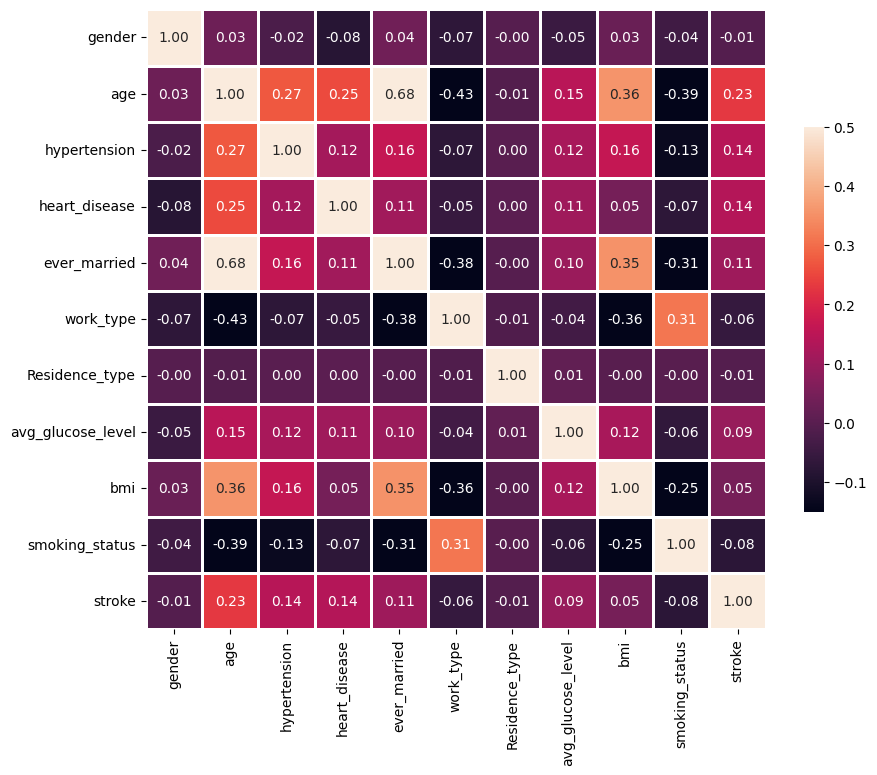

In [18]:
df_copy = data.copy()

df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x+10)*3)
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x+10)*2)

ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()


for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])
    
cols = df_copy.columns

df_copy[cols] = ss.fit_transform(df_copy[cols])

df_corr = df_copy.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize = (10, 10))

mask = mask[1:, :-1]
corr = df_corr.copy()

sns.heatmap(corr, annot=True, fmt=".2f",vmin=-0.15, vmax=0.5,
            cbar_kws={"shrink": .5, }, ax = ax, cbar = True,
           linewidth = 1,square = True)

ax.tick_params(axis = 'y', rotation=0)
xticks = ['Gender', 'Age','Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status','Stroke','BMI Cat','Age Cat']
yticks = ['Gender', 'Age','Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status','Stroke','BMI Cat','Age Cat']
ax.set_xticklabels(xticks, {'size':10, 'weight':'bold'},rotation = 90, alpha = 0.9)
ax.set_yticklabels(yticks, {'size':10, 'weight':'bold'}, rotation = 0, alpha = 0.9)
ax.text(2.2, -0.5, 'Matriz de Correlación',{'size':20, 'weight':'bold'} ,alpha=0.9)


# Consultas

In [20]:
df = pd.read_csv('./data-limpia.csv')


### 1. ¿Donde se da la mayor cantidad de ataques, en zonas urbanas o rurales ?
Se observa que en zonas rurales y en zonas urbanas, la cantidad de personas que sufrieron o no un ataque es similiar. Uno pensaría que en zonas urbanas el número de ataques sería mayor debido al ritmo acelerado que hay en las ciudades pero la diferencia es casi imperceptible.

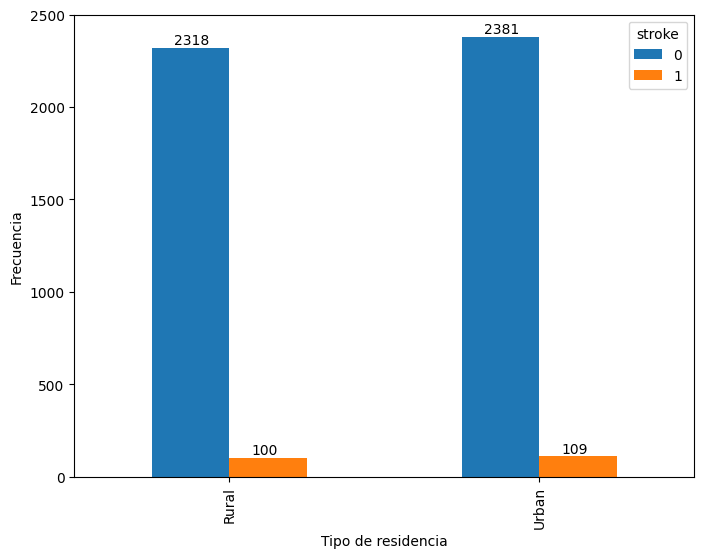

In [21]:
per_ataque = df.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0).reset_index()

fig, axes = plt.subplots(figsize=(8, 6))
# axes.set_title("Número de personas que sufrieron un ataque según su Residencia")
per_ataque.plot(x="Residence_type", y=[0, 1], kind="bar", ax=axes)
axes.set_xlabel("Tipo de residencia")
axes.set_ylabel("Frecuencia")
for p in axes.patches:
    axes.annotate(str(p.get_height()), (p.get_x() + 0.07, p.get_height() + 20))


### 2. ¿Los niveles de glucosa están asociados a producir un ataque?

El valor normal de la glusoa media estimada (eAG) está entre 70 mg/dl y 114  mg/dl. Una persona con prediabetes tiene entre 114 mg/dL y 140 mg/dL mientras que una persona con diabetes el eAG es superior a 140 mg/dL. En la gráfica se observa la distribución de eAG es similar en ambos casos (stroke y no stroke), sin embargo hay una mayor cantidad de personas que sufrieron de un ataque estando con diabetes y un mayor número de personas que no sufrieron un ataque teniendo niveles normales de eAG. Por lo que tener niveles altos de glucosa podría ser una de las causas de sufrir un ataque.

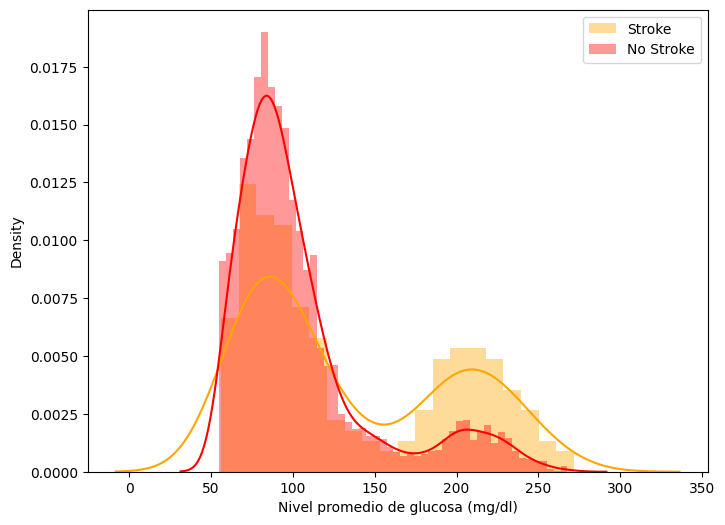

In [22]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(df[df.stroke == 1].avg_glucose_level, color='orange', label='Stroke', bins=20)
sns.distplot(df[df.stroke == 0].avg_glucose_level, color='red', label='No Stroke')
plt.legend()
plt.xlabel("Nivel promedio de glucosa (mg/dl)")
plt.show()


### 3. ¿De los que sufrieron un ataque quienes fuman más?
Se observa que hay una mayor cantidad de mujeres que no ha fumando sin embargo sufrió un ataque.

In [23]:
df_stroke = df.loc[(df.stroke == 1) & (df.smoking_status == 'smokes')] 
df_stroke = df_stroke[["gender", "smoking_status"]].groupby("smoking_status").value_counts()
df_stroke


smoking_status  gender
smokes          Male      21
                Female    18
dtype: int64

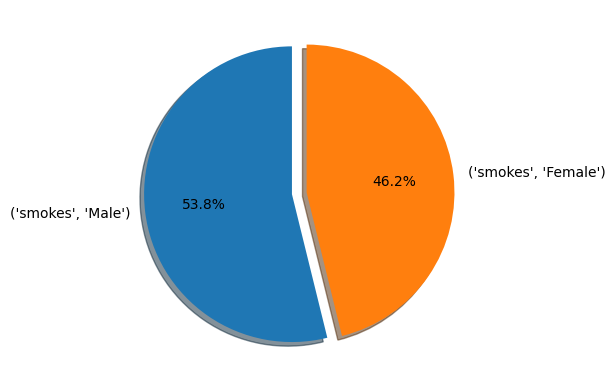

In [24]:
data = df_stroke.values
keys = df_stroke.index
explode = (0.0, 0.1) 

fig1, ax1 = plt.subplots()
# ax1.set_title("Género de personas que sufrieron un ataque y no fuman")
ax1.pie(data, explode=explode, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

### 4. ¿Que edades son más propensos a sufrir un ataque en cada tipo de empleo?
De la grafica se observa que en todos los tipos de empleo hay un mayor número de casos de ataque en los adultos mayores.

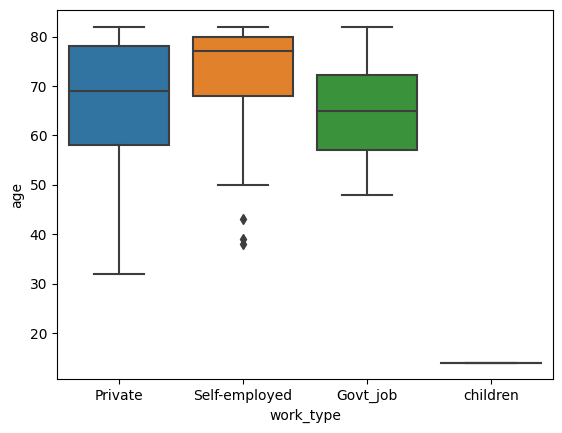

In [25]:
df_stroke = df.loc[(df.stroke == 1) & (df.age > 18)]
sns.boxplot(x='work_type', y='age', data=df_stroke)
plt.show()


### 5. ¿Qué porcentaje de mujeres con diabetes sufrieron un ataque?

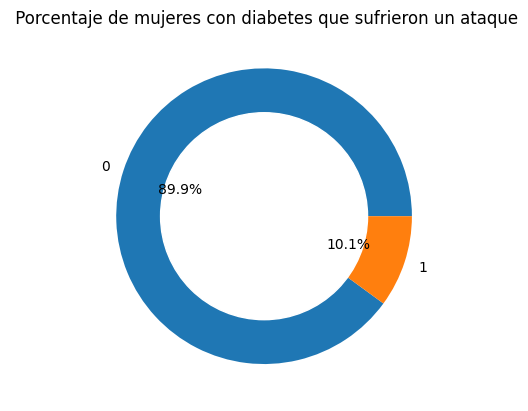

In [ ]:
df_glucosa = df.loc[(df.avg_glucose_level > 140) & (df.gender == 'Female')]
vals = df_glucosa["stroke"].value_counts()
data_values = vals.values
keys = vals.index

explode = (0.0, 0.0)

fig1, ax1 = plt.subplots()
ax1.set_title(" Porcentaje de mujeres con diabetes que sufrieron un ataque")
ax1.pie(data_values, explode=explode, labels=keys, autopct='%1.1f%%')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("Probability mass function: sepal length")
ax.scatter([1, 2, 3, 4], p1)
ax.vlines([1, 2, 3, 4], [0], p1, linestyles='dotted', lw=2)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["Very Short", "Short", "Long", "Very Long"])
plt.grid()
plt.show()


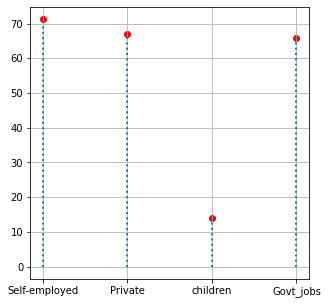

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter([1, 2, 3, 4], [71.207547, 67.102362, 14.0, 65.785714], c="r")
ax.vlines([1, 2, 3, 4], [0], [71.207547, 67.102362, 14.0, 65.785714], linestyles='dotted', lw=2)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["Self-employed", "Private", "children", "Govt_jobs"])
plt.grid()
plt.show()

In [ ]:
data = pd.read_csv('./data-numerica.csv')

### 6. ¿Qué porcentaje de personas con hipertensión sufren de un ataque?

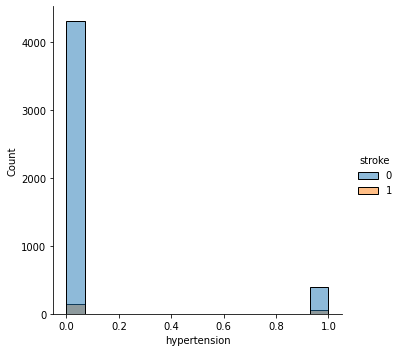

In [ ]:
sns.displot( data= data,x =  "hypertension" , hue="stroke")


In [ ]:
hipertensos = data.loc[data["hypertension"] == 1]


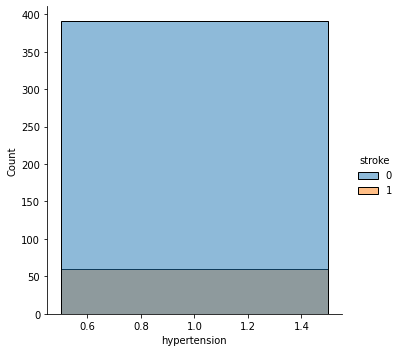

In [ ]:
sns.displot( data=hipertensos, x ="hypertension", hue="stroke")


In [ ]:
fraccion = hipertensos["stroke"].sum()/hipertensos["hypertension"].count() 
print(  "Porcentaje de personas que sufrieron un stroke dado que eran hipertensos",  fraccion *100 , "%")

Porcentaje de personas que sufrieron un stroke dado que eran hipertensos 13.303769401330376 %


### 7. ¿Qué porcentaje de personas con un heart_disease sufren de un ataque?

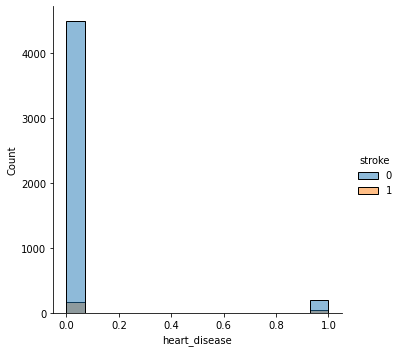

In [ ]:
sns.displot( data= data,x =  "heart_disease" , hue="stroke")


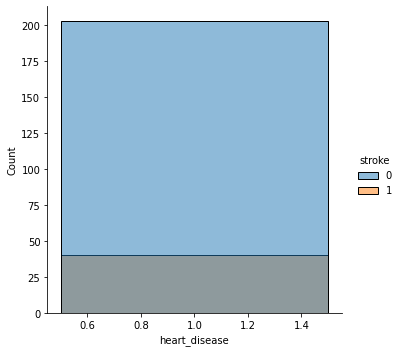

In [ ]:
con_disease = data.loc[data["heart_disease"] == 1]
sns.displot( data=con_disease, x ="heart_disease", hue="stroke")


In [ ]:
fraccion = con_disease["stroke"].sum()/con_disease["hypertension"].count() 
print(  "Porcentaje de personas que sufrieron un stroke dado que eran hipertensos",  fraccion *100  , "%")

Porcentaje de personas que sufrieron un stroke dado que eran hipertensos 16.46090534979424 %


### 8. ¿Cuál es el bmi más común entre las personas que sufrieron un ataque?

In [ ]:
sufireron_stroke =  data.loc[data["stroke"] == 1]

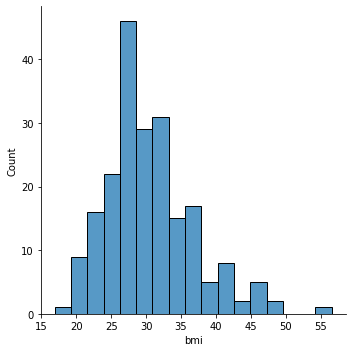

In [ ]:
sns.displot( data=sufireron_stroke, x ="bmi")


In [ ]:
sufireron_stroke["bmi"].mode()[0]

27.3

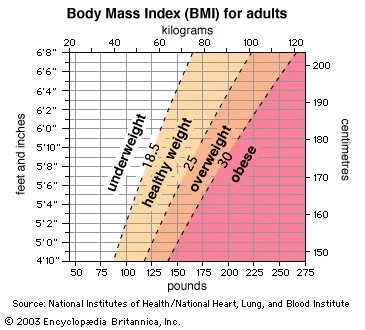

### 9. ¿Qué porcentaje de personas con sobrepeso sufrieron un ataque?


In [ ]:
saludable =  data.loc[ data["bmi"] <25 ]
sobrepeso =  data.loc[(data["bmi"] > 25) & (data["bmi"] < 30) ]
obesidad =  data.loc[ data["bmi"] >30 ]

In [ ]:
def porcento_stroke (dataf:pd.DataFrame):
    return (dataf["stroke"].sum() / len(dataf))*100

print("Porcentaje de ataques en personas saludable: " , porcento_stroke(saludable) , "%")
print("Porcentaje de ataques en personas sobrepeso: " , porcento_stroke(sobrepeso) , "%")
print("Porcentaje de ataques en personas obesidad: " , porcento_stroke(obesidad) , "%")


Porcentaje de ataques en personas saludable:  2.279924002533249 %
Porcentaje de ataques en personas sobrepeso:  5.2821997105644 %
Porcentaje de ataques en personas obesidad:  5.071315372424722 %


### 10. ¿Qué porcentaje de personas sufren de un ataque por género?

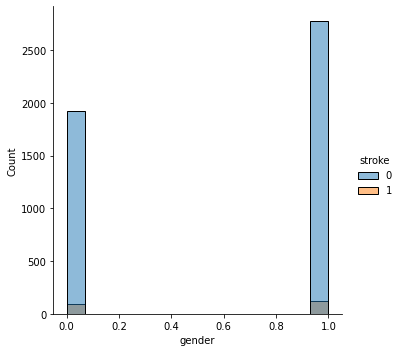

In [ ]:
sns.displot( data= data,x =  "gender" , hue="stroke")


In [ ]:
genre_strokes  = data.groupby("gender").agg({'stroke': 'sum'})
genre_total  = data.groupby("gender").count()["id"].to_frame()

In [ ]:
genre_strokes

,stroke
gender,
0,89
1,120


In [ ]:
genre_total

,id
gender,
0,2011
1,2897


In [ ]:
((genre_strokes["stroke"]/genre_total["id"])*100).to_frame()

,0
gender,
0,4.425659
1,4.142216


### 11. ¿ Existe algún menor de edad que sufrió un ataque y cual fue probable el motivo?

In [ ]:
data_menores = data[(data['age'] <18)]
data_menores.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
206,49669,1,14.0,0,0,0,4,1,57.93,30.9,4,1
209,30669,0,3.0,0,0,0,4,1,95.12,18.0,4,0
211,16523,1,8.0,0,0,0,1,0,110.89,17.6,4,0
213,46136,0,14.0,0,0,0,5,1,161.28,19.1,4,0
242,33759,1,3.0,0,0,0,4,0,73.74,16.0,4,0
244,26325,0,14.0,0,0,0,3,0,82.34,31.6,4,0


In [ ]:
data_menores = data[(data['age'] <18) & (data['stroke'] == 1)]
data_menores.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
206,49669,1,14.0,0,0,0,4,1,57.93,30.9,4,1


**Existe un unico caso de un niño de 14 que sufrió de un ataque que problablemente el motivo fue su bmi alto (obeso) y su bajo nivel de glucosa(avg_glucose_leve)**

### 12. ¿Cuál es la distribución de personas que han sufrido un ataque por genero y el tipo de trabajo?

In [ ]:
data_mayores = data[(data['age'] >=18)]

sano = data_mayores[data_mayores['stroke'] == 0]
stroke = data_mayores[data_mayores['stroke'] == 1]

stroke = pd.crosstab(stroke['gender'], [stroke['work_type']], normalize='index')
no_stroke = pd.crosstab(sano['gender'], [sano['work_type']], normalize='index')

print("Sufriendo de un ataque:")
display(stroke.head())

print("No sufriendo de un ataque:")
display(no_stroke.head())

Sufriendo de un ataque:


work_type,1,2,3
gender,,,
0,0.674157,0.224719,0.101124
1,0.563025,0.277311,0.159664


No sufriendo de un ataque:


work_type,1,2,3,5
gender,,,,
0,0.662876,0.181271,0.155184,0.000669
1,0.659350,0.185310,0.153651,0.001688


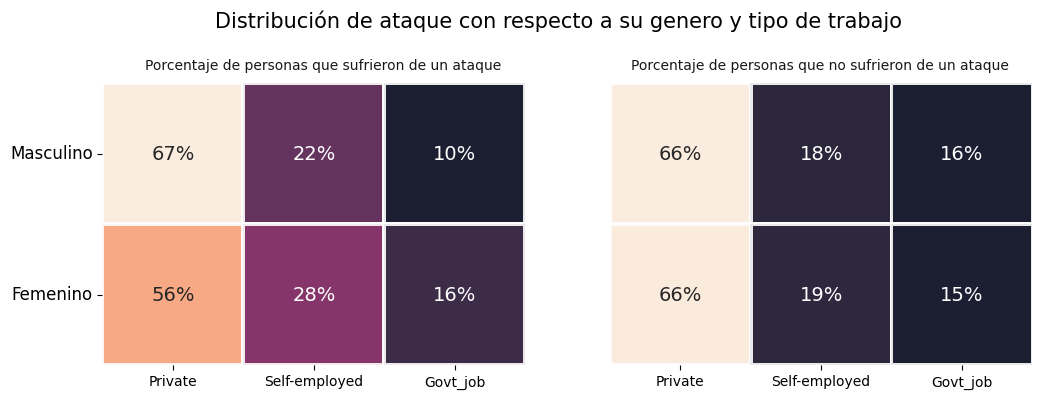

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi = 100)
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"}, 
            cbar=False,linewidth=2,   annot=True, fmt='1.0%',annot_kws={"fontsize":14} ,alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke.iloc[:, :-1], linewidths=0, square=True, cbar_kws={"orientation":"horizontal"},
            cbar=False, linewidth=2 ,annot=True, fmt='1.0%',annot_kws={"fontsize":14} , alpha=0.9)

ax0.text(0.8, -0.4, 'Distribución de ataque con respecto a su genero y tipo de trabajo',{'size':15})

ax0.text(0.3, -0.1, 'Porcentaje de personas que sufrieron de un ataque', alpha=0.9)
ax1.text(0.15, -0.1, 'Porcentaje de personas que no sufrieron de un ataque', alpha=0.9)
ax0.axes.set_xticklabels(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], {'size':10})
ax1.axes.set_xticklabels(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], {'size':10})

ax0.axes.set_yticklabels(['Masculino', 'Femenino'],{'size':12}, rotation = 0 )

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

**Se puede observar que tanto los hombres como las mujeres que trabajan en empresas privadas son las mas propensas a sufrir un ataque.**

### 13. ¿Cuál es la distribución de personas que han sufrido un ataque por genero y smoking status?

In [ ]:
sano = data[data['stroke'] == 0]
stroke = data[data['stroke'] == 1]

stroke = pd.crosstab(stroke['gender'], [stroke['smoking_status']], normalize='index')
no_stroke = pd.crosstab(sano['gender'], [sano['smoking_status']], normalize='index')

print("Sufriendo de un ataque:")
display(stroke.head())

print("No sufriendo de un ataque:")
display(no_stroke.head())

Sufriendo de un ataque:


smoking_status,1,2,3,4
gender,,,,
0,0.325843,0.280899,0.235955,0.157303
1,0.233333,0.491667,0.150000,0.125000


No sufriendo de un ataque:


smoking_status,1,2,3,4
gender,,,,
0,0.181582,0.324662,0.151405,0.342352
1,0.154843,0.411955,0.146561,0.286640


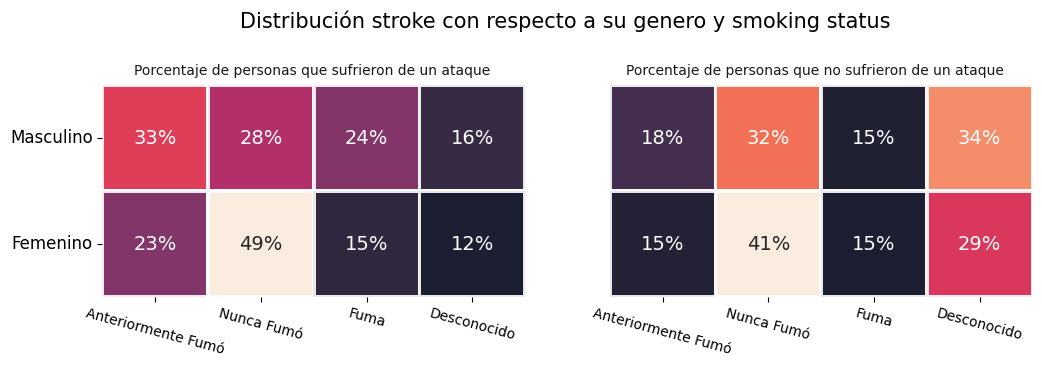

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi = 100)
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"}, 
            cbar=False,linewidth=2,   annot=True, fmt='1.0%',annot_kws={"fontsize":14} ,alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"},
            cbar=False, linewidth=2 ,annot=True, fmt='1.0%',annot_kws={"fontsize":14} , alpha=0.9)

ax0.text(1.3, -0.55, 'Distribución stroke con respecto a su genero y smoking status',{'size':15})

ax0.text(0.3, -0.1, 'Porcentaje de personas que sufrieron de un ataque', alpha=0.9)
ax1.text(0.15, -0.1, 'Porcentaje de personas que no sufrieron de un ataque', alpha=0.9)

ax0.axes.set_xticklabels(['Anteriormente Fumó', 'Nunca Fumó', 'Fuma', 'Desconocido'], {'size':10}, rotation = -15)
ax1.axes.set_xticklabels(['Anteriormente Fumó', 'Nunca Fumó', 'Fuma', 'Desconocido'], {'size':10}, rotation = -15)

ax0.axes.set_yticklabels(['Masculino', 'Femenino'],{'size':12}, rotation = 0 )

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

**Los hombres que anteriormente fumaban son los que más tuvieron un accidente cerebrovascular y las mujeres que no fumaron son los que más tuvieron un accidente cerebrovascular**

### 14. ¿Cuál es la distribución de personas que han sufrido un ataque por genero y problemas al corazon?

In [ ]:
sano = data[data['stroke'] == 0]
stroke = data[data['stroke'] == 1]

stroke = pd.crosstab(stroke['gender'], [stroke['heart_disease']], normalize='index')
no_stroke = pd.crosstab(sano['gender'], [sano['heart_disease']], normalize='index')

print("Sufriendo de un ataque:")
display(stroke.head())

print("No sufriendo de un ataque:")
display(no_stroke.head())

Sufriendo de un ataque:


heart_disease,0,1
gender,,
0,0.730337,0.269663
1,0.866667,0.133333


No sufriendo de un ataque:


heart_disease,0,1
gender,,
0,0.938085,0.061915
1,0.969752,0.030248


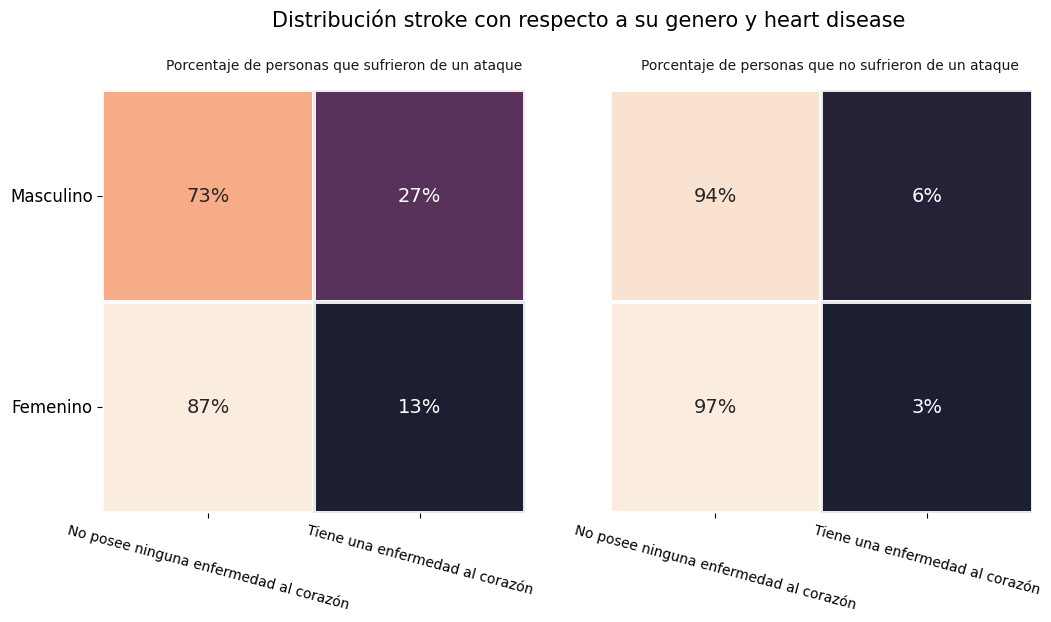

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi = 100)
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"}, 
            cbar=False,linewidth=2,   annot=True, fmt='1.0%',annot_kws={"fontsize":14} ,alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"},
            cbar=False, linewidth=2 ,annot=True, fmt='1.0%',annot_kws={"fontsize":14} , alpha=0.9)

ax0.text(0.8, -0.3, 'Distribución stroke con respecto a su genero y heart disease',{'size':15})

ax0.text(0.3, -0.1, 'Porcentaje de personas que sufrieron de un ataque', alpha=0.9)
ax1.text(0.15, -0.1, 'Porcentaje de personas que no sufrieron de un ataque', alpha=0.9)

ax0.axes.set_xticklabels(['No posee ninguna enfermedad al corazón', 'Tiene una enfermedad al corazón'], {'size':10}, rotation = -15)
ax1.axes.set_xticklabels(['No posee ninguna enfermedad al corazón', 'Tiene una enfermedad al corazón'], {'size':10}, rotation = -15)

ax0.axes.set_yticklabels(['Masculino', 'Femenino'],{'size':12}, rotation = 0 )

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

**Tanto los hombres como las mujeres que no tuvieron ninguna enfermedad al corazón sufrieron de un accidente cerebrovascular**

### 15. ¿Cuál es la distribución de personas que han sufrido un ataque por genero y etapa de la vida?

In [ ]:
bins = [0, 6, 12, 20, 25, 60, 100]
etapas_vida = ['Infante', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Persona Mayor']
data['etapa'] = pd.cut(data['age'], bins, labels=etapas_vida)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,etapa
0,0,67.0,0,1,1,1,0,228.69,36.6,1,1,Persona Mayor
1,0,80.0,0,1,1,1,1,105.92,32.5,2,1,Persona Mayor
2,1,49.0,0,0,1,1,0,171.23,34.4,3,1,Adulto
3,1,79.0,1,0,1,2,1,174.12,24.0,2,1,Persona Mayor
4,0,81.0,0,0,1,1,0,186.21,29.0,1,1,Persona Mayor


In [ ]:
sano = data[data['stroke'] == 0]
stroke = data[data['stroke'] == 1]

stroke = pd.crosstab(stroke['gender'], [stroke['etapa']], normalize='index')
no_stroke = pd.crosstab(sano['gender'], [sano['etapa']], normalize='index')

print("Sufriendo de un ataque:")
display(stroke.head())

print("No sufriendo de un ataque:")
display(no_stroke.head())

Sufriendo de un ataque:


etapa,Adolescencia,Adultez,Persona Mayor
gender,,,
0,0.000000,0.280899,0.719101
1,0.008333,0.308333,0.683333


No sufriendo de un ataque:


etapa,Infantil,Niñez,Adolescencia,Juventud,Adultez,Persona Mayor
gender,,,,,,
0,0.090531,0.068158,0.098855,0.045265,0.468783,0.228408
1,0.057616,0.039251,0.084624,0.063738,0.527188,0.227584


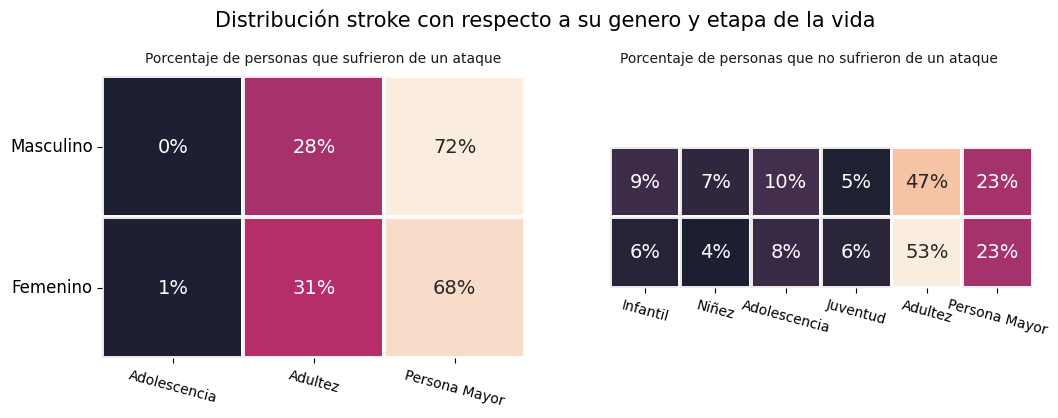

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi = 100)
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.heatmap(ax=ax0, data=stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"}, 
            cbar=False,linewidth=2,   annot=True, fmt='1.0%',annot_kws={"fontsize":14} ,alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, square=True, cbar_kws={"orientation":"horizontal"},
            cbar=False, linewidth=2 ,annot=True, fmt='1.0%',annot_kws={"fontsize":14} , alpha=0.9)

ax0.text(0.8, -0.35, 'Distribución stroke con respecto a su genero y etapa de la vida',{'size':15})

ax0.text(0.3, -0.1, 'Porcentaje de personas que sufrieron de un ataque', alpha=0.9)
ax1.text(0.15, -1.2, 'Porcentaje de personas que no sufrieron de un ataque', alpha=0.9)

ax0.axes.set_xticklabels(['Adolescente', 'Adulto', 'Persona Mayor'], {'size':10}, rotation = -15)
ax1.axes.set_xticklabels(['Infante', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Persona Mayor'], {'size':10}, rotation = -15)

ax0.axes.set_yticklabels(['Masculino', 'Femenino'],{'size':12}, rotation = 0 )

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

**Tanto los hombres como las mujeres en la etapa de la vejez son los que más probabilidad tenga de sufrir un accidente cerebrovascular**

### 16 ¿Qué tipo de trabajo es el más común en las personas que sufrieron un ataque? 

In [ ]:
per_ataque  = df.groupby(['stroke'])['stroke'].count()

In [ ]:
per_ataque

stroke
0    4699
1     209
Name: stroke, dtype: int64

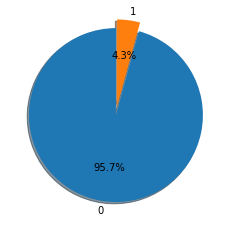

In [ ]:
data = per_ataque.values
keys = per_ataque.index
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

Podemos observar que solo 3l 4.9% de las personas tuvo un ataque cerebrovascular.

In [ ]:
stroke = df[df['stroke']==1].groupby('work_type')['work_type'].count()
stroke

work_type
Govt_job          28
Private          127
Self-employed     53
children           1
Name: work_type, dtype: int64

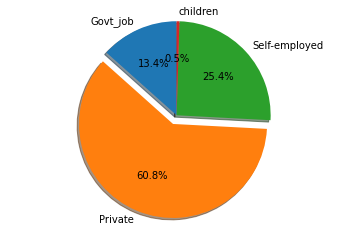

In [ ]:
data = stroke.values
keys = stroke.index
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Podemos observar que de todas las personas que sufrieron un ataque, pertenecen al sector Prviado. 

### 17. ¿Cómo afecta el hecho de estar casado a tener un ataque? 

In [ ]:
df[df['stroke']==1].groupby('ever_married')['ever_married'].count()

ever_married
No      23
Yes    186
Name: ever_married, dtype: int64

88% si

In [ ]:
df[df['stroke']==1].groupby('ever_married')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
ever_married,,,,,,,,
No,23.0,66.521739,16.645692,14.0,59.00,69.0,78.5,82.0
Yes,186.0,67.860215,11.824017,32.0,58.25,70.5,78.0,82.0


In [ ]:
df[df['stroke']==0].groupby('ever_married')['ever_married'].count()

ever_married
No     1681
Yes    3018
Name: ever_married, dtype: int64

64% Si

En este caso podemos observar que tanto en los que tuvieron un ataque, como en los que no, el porcentaje de los casados es mayor. Por lo tanto no podemos concluir una relación directa entre estar casado y sufrir de un ataque. 

### 18. ¿A qué edad es más probable sufrir un ataque? 

In [ ]:
df[df['stroke']==1]['age'].describe()

count    209.000000
mean      67.712919
std       12.402848
min       14.000000
25%       58.000000
50%       70.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

In [ ]:
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)
from bokeh.plotting import figure, output_file, show
output_file("gfg.html")
graph = figure(title = "Bokeh Line Graph")
stroke_by_age = df[df['stroke']==1].groupby('age')['age'].count()
x = stroke_by_age.index 
y = stroke_by_age.values
# plotting the line graph
graph.line(x, y)
   
# displaying the model
show(graph)

Podemos observar que la media en la edad es de 67 años, por lo tanto podríamos decir que los adultos mayores a partir de 67 son más propensos de sufrir de un ataque. Sin embargo a partir de los 40 años ya se incrementa la posibilidad.

### 19. ¿Qué porcentaje de las personas que fuman sufrieron de un ataque? 

In [ ]:
df[df['stroke']==1].groupby('smoking_status')['smoking_status'].count()

smoking_status
Unknown            29
formerly smoked    57
never smoked       84
smokes             39
Name: smoking_status, dtype: int64

In [ ]:
s_s = df[df['stroke']==1].groupby('smoking_status')['smoking_status'].count()

In [ ]:
s_s[3]/len(df[df['stroke']==1])*100

18.660287081339714

In [ ]:
(s_s[3]+s_s[1])/len(df[df['stroke']==1])*100

45.933014354066984

Podemos observar que solo el 16% tenía el hábito de fumar y el 45% fumaba o había tenido el hábido de fumar alguna vez. 

### 20. ¿Qué porcentaje de las personas que tuvieron un ataque tenían un bmi alto y fumaban? 
(entre 18.5 y 24.9, se encuentra dentro del rango de peso normal o saludable.)

In [ ]:
pep_stroke = df[df['stroke']==1]
pep_highBMI = pep_stroke[pep_stroke['bmi']>25]

In [ ]:
len(pep_highBMI[pep_highBMI['smoking_status']=='smokes'])/len(pep_stroke)*100

16.267942583732058

Podemos observar que el 13% de las personas que tuvieron un ataque tenían tanto un BMI alto como el hábito de fumar. 